## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.

number_mice = mouse_study_results["Mouse ID"].count()
number_mice

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_results.loc[mouse_study_results.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice 

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = mouse_study_results.loc[mouse_study_results.duplicated(), :]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study = mouse_study_results[mouse_study_results["Mouse ID"].isin(duplicate_mice)==False]
clean_mouse_study.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [10]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_study["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimens = clean_mouse_study.groupby("Drug Regimen")
regimens_df = {
    "Mean": regimens["Tumor Volume (mm3)"].mean(),
    "Median": regimens["Tumor Volume (mm3)"].median(),
    "Variance": regimens["Tumor Volume (mm3)"].var(),
    "SEM": regimens["Tumor Volume (mm3)"].sem(),
}
regimens_df = pd.DataFrame(regimens_df)
regimens_df

,Mean,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

agg_regimens_df = regimens["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_regimens_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

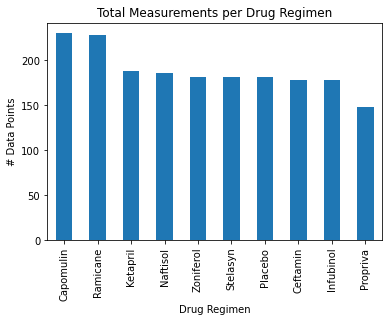

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_regimen = clean_mouse_study["Drug Regimen"].value_counts()
bar_regimen.plot(kind="bar", figsize=(6,4))
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# Data Points")
plt.show()


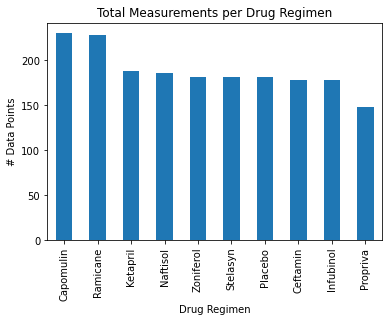

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measure_count = bar_regimen.plot(kind='bar')
measure_count.set_title("Total Measurements per Drug Regimen")
measure_count.set_xlabel("Drug Regimen", rotation="horizontal")
measure_count.set_ylabel("# Data Points")
plt.show()

<AxesSubplot:title={'center':'Gender Distribution of Mice'}, ylabel='Sex'>

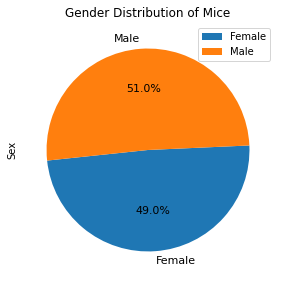

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_mouse_study.groupby('Sex')
gender_count = gender["Sex"].count()
plt.figure(figsize=(10,10))
axis1 = plt.subplot(121, aspect="equal")
gender_count.plot(kind='pie', title='Gender Distribution of Mice', y="Quantity", ax=axis1, autopct='%1.1f%%', startangle=186, shadow=False, legend=True, fontsize=11)


Text(0.5, 1.0, 'Gender Distribution of Mice')

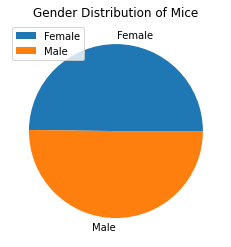

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_plot = [[sex, mouse_metadata["Sex"].loc[mouse_metadata["Sex"]==sex].count()] for sex in mouse_metadata["Sex"].unique()]
pie_plot = sorted(pie_plot, key=lambda x: x[1], reverse = False)
plt.pie([pie_plot[i][1] for i in range(len(pie_plot))], labels=[pie_plot[i][0] for i in range(len(pie_plot))])
       
plt.legend(loc='upper left')
plt.title("Gender Distribution of Mice")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_vol_df=clean_mouse_study.groupby('Mouse ID')

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_mouse_study.groupby(clean_mouse_study['Mouse ID']).max()['Timepoint']
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

timepoint_mouse_df = pd.merge(last_timepoint_df, mouse_study_results, on=('Mouse ID', 'Timepoint'), how='left')
timepoint_mouse_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin','Ceftamin','Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    temp_data = timepoint_mouse_df[timepoint_mouse_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    tumor_vol_data[treatment] = temp_data.tolist()
  
    # Determine outliers using upper and lower bounds
    quartiles = temp_data.quantile([.25,.5,.75])
    q_lower = quartiles[0.25]
    q_upper = quartiles[0.75]
    q_inter = q_upper-q_lower

    #print statements
    print(f"for Drug: {treatment}.")
    print(f"The lower quartile of Tumor Vol (mm3) is: {q_lower}")
    print(f"The upper quartile of Tumor Vol (mm3) is: {q_upper}")
    print(f"The interquartile range of Tumor Vol (mm3) is: {q_inter}")

    lower_bound = q_lower - (1.5*q_inter)
    upper_bound = q_upper + (1.5*q_inter)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("Potential outliers:")
    print(timepoint_mouse_df.loc[(timepoint_mouse_df["Drug Regimen"]==treatment)\
                             &((timepoint_mouse_df["Tumor Volume (mm3)"]<lower_bound)\
                               |(timepoint_mouse_df["Tumor Volume (mm3)"]>upper_bound))][["Mouse ID","Timepoint","Tumor Volume (mm3)"]])
    print("------------------------------------------------------")


for Drug: Capomulin.
The lower quartile of Tumor Vol (mm3) is: 32.37735684
The upper quartile of Tumor Vol (mm3) is: 40.1592203
The interquartile range of Tumor Vol (mm3) is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []
------------------------------------------------------
for Drug: Ceftamin.
The lower quartile of Tumor Vol (mm3) is: 48.72207785
The upper quartile of Tumor Vol (mm3) is: 64.29983003
The interquartile range of Tumor Vol (mm3) is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3)]
Index: []
------------------------------------------------------
for Drug: Infubinol.
The lower quartile of Tumor Vol (mm3) is: 54.04860769
The upper quartile of Tumor Vol (mm3) i

In [19]:
tumor_vol_data_df = pd.DataFrame(tumor_vol_data)
tumor_vol_data_df.head()

,Capomulin,Ceftamin,Infubinol,Ramicane
0,38.982878,62.999356,67.973419,38.407618
1,38.939633,45.000000,65.525743,43.047543
2,30.485985,56.057749,57.031862,38.810366
3,37.074024,55.742829,66.083066,32.978522
4,40.159220,48.722078,72.226731,38.342008


([<matplotlib.axis.XTick at 0x11c42fb20>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ceftamin'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ramicane')])

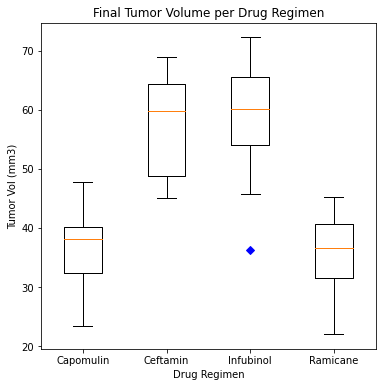

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_vol = []
for treatment in treatment_list:
    final_tumor_vol.append(list(tumor_vol_data_df[treatment].dropna()))
fig1, ax = plt.subplots(figsize=(6,6))
ax.set_title("Final Tumor Volume per Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Vol (mm3)")
ax.boxplot(final_tumor_vol, notch=0, sym='bD')
plt.xticks([1, 2, 3, 4], treatment_list)

## Line and Scatter Plots

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = timepoint_mouse_df.loc[timepoint_mouse_df["Drug Regimen"]=="Capomulin"]
capomulin_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


In [29]:
capomulin_g316_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "g316"]
capomulin_g316_df = capomulin_df.groupby(["Timepoint"]).agg(avg_tum_vol=('Tumor Volume (mm3)', np.mean)).round(4)
capomulin_g316_df

,avg_tum_vol
Timepoint,
10,39.9523
15,46.5392
20,30.4860
35,38.7533
45,36.2361


In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
